## Feature Selection

* Feature selection - Feature selection is the process of reducing the number of input       variables to the model we are training by using only relevant data and getting rid of       noise(i.e overfitting). We use feature selection to also improve the accuracy of our       model

Feature selection can implemented in both supervised and unsupervised learning.
Supervised feature selection refers to the method which used the output label class for feature selection. Feature selection in supervised learning can be done in three methods.

**Intrinsic method**- This method used the qualities of both the filter and wrapper method to create the best subset

**Filter method**- In this method features are dropped basd on their relation to the output or how they are correlating to the output

**Wrapper method**- Using this method we split our data into subsets and train the model

Statististical tests can be applied to select the features that have the strongest 
relationship with the output i.e which of the independent variables contribute the most 
towards the output value

Here, I am using the scikit-learn library SelectKBest which determines the best 'K' no. of 
attributes contributing the most towards the output

Internally we have something called chi squared statistical test for non-negative features to select K no. of the best features from the heart disease dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = df.drop("target", axis=1)
y = df["target"]

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
#Applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)


In [7]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [8]:
#Concatanating the two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  

In [9]:
featureScores

,Features,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [10]:
print(featureScores.nlargest(10,'Score'))  #print 10 of the best best features

    Features       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


## Feature Importance

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [12]:
model.feature_importances_

array([0.07028451, 0.05622178, 0.13228819, 0.06236256, 0.06077604,
       0.02031391, 0.03709546, 0.0835218 , 0.09518367, 0.08789088,
       0.07211823, 0.12189419, 0.10004878])

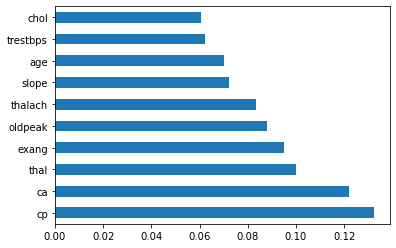

In [13]:
#Ploting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()